<a href="https://colab.research.google.com/github/VineetRoy1106/Nifty-50/blob/main/Nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

### Task 1

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock symbols from Nifty 50
nifty50_stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'ITC.NS', 'ICICIBANK.NS']

# Set the time range: last 6 months
end_date = datetime.today()
start_date = end_date - timedelta(days=6*30)  # Approximate 6 months

# Fetch historical data for the selected stocks and store in a pandas DataFrame
all_data = pd.DataFrame()

for stock in nifty50_stocks:
    stock_df = yf.download(stock, start=start_date, end=end_date)
    stock_df['Stock'] = stock  # Add a column to identify the stock
    all_data = pd.concat([all_data, stock_df], axis=0)

# Reset index for cleaner display
all_data.reset_index(inplace=True)

# Display the combined data
all_data.head() # Show the first few rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2024-04-01,2984.949951,2987.949951,2965.000000,2969.550049,2959.505615,2506940,RELIANCE.NS
1,2024-04-02,2968.000000,2988.000000,2950.000000,2973.899902,2963.840576,4455083,RELIANCE.NS
2,2024-04-03,2964.149902,2968.899902,2937.800049,2943.199951,2933.244629,3504146,RELIANCE.NS
3,2024-04-04,2959.500000,2959.500000,2900.000000,2925.850098,2915.953369,7245136,RELIANCE.NS
4,2024-04-05,2921.750000,2941.600098,2912.000000,2920.199951,2910.322266,3721149,RELIANCE.NS


In [16]:
all_data.shape

(610, 9)

<ipython-input-4-668932ca7b70>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


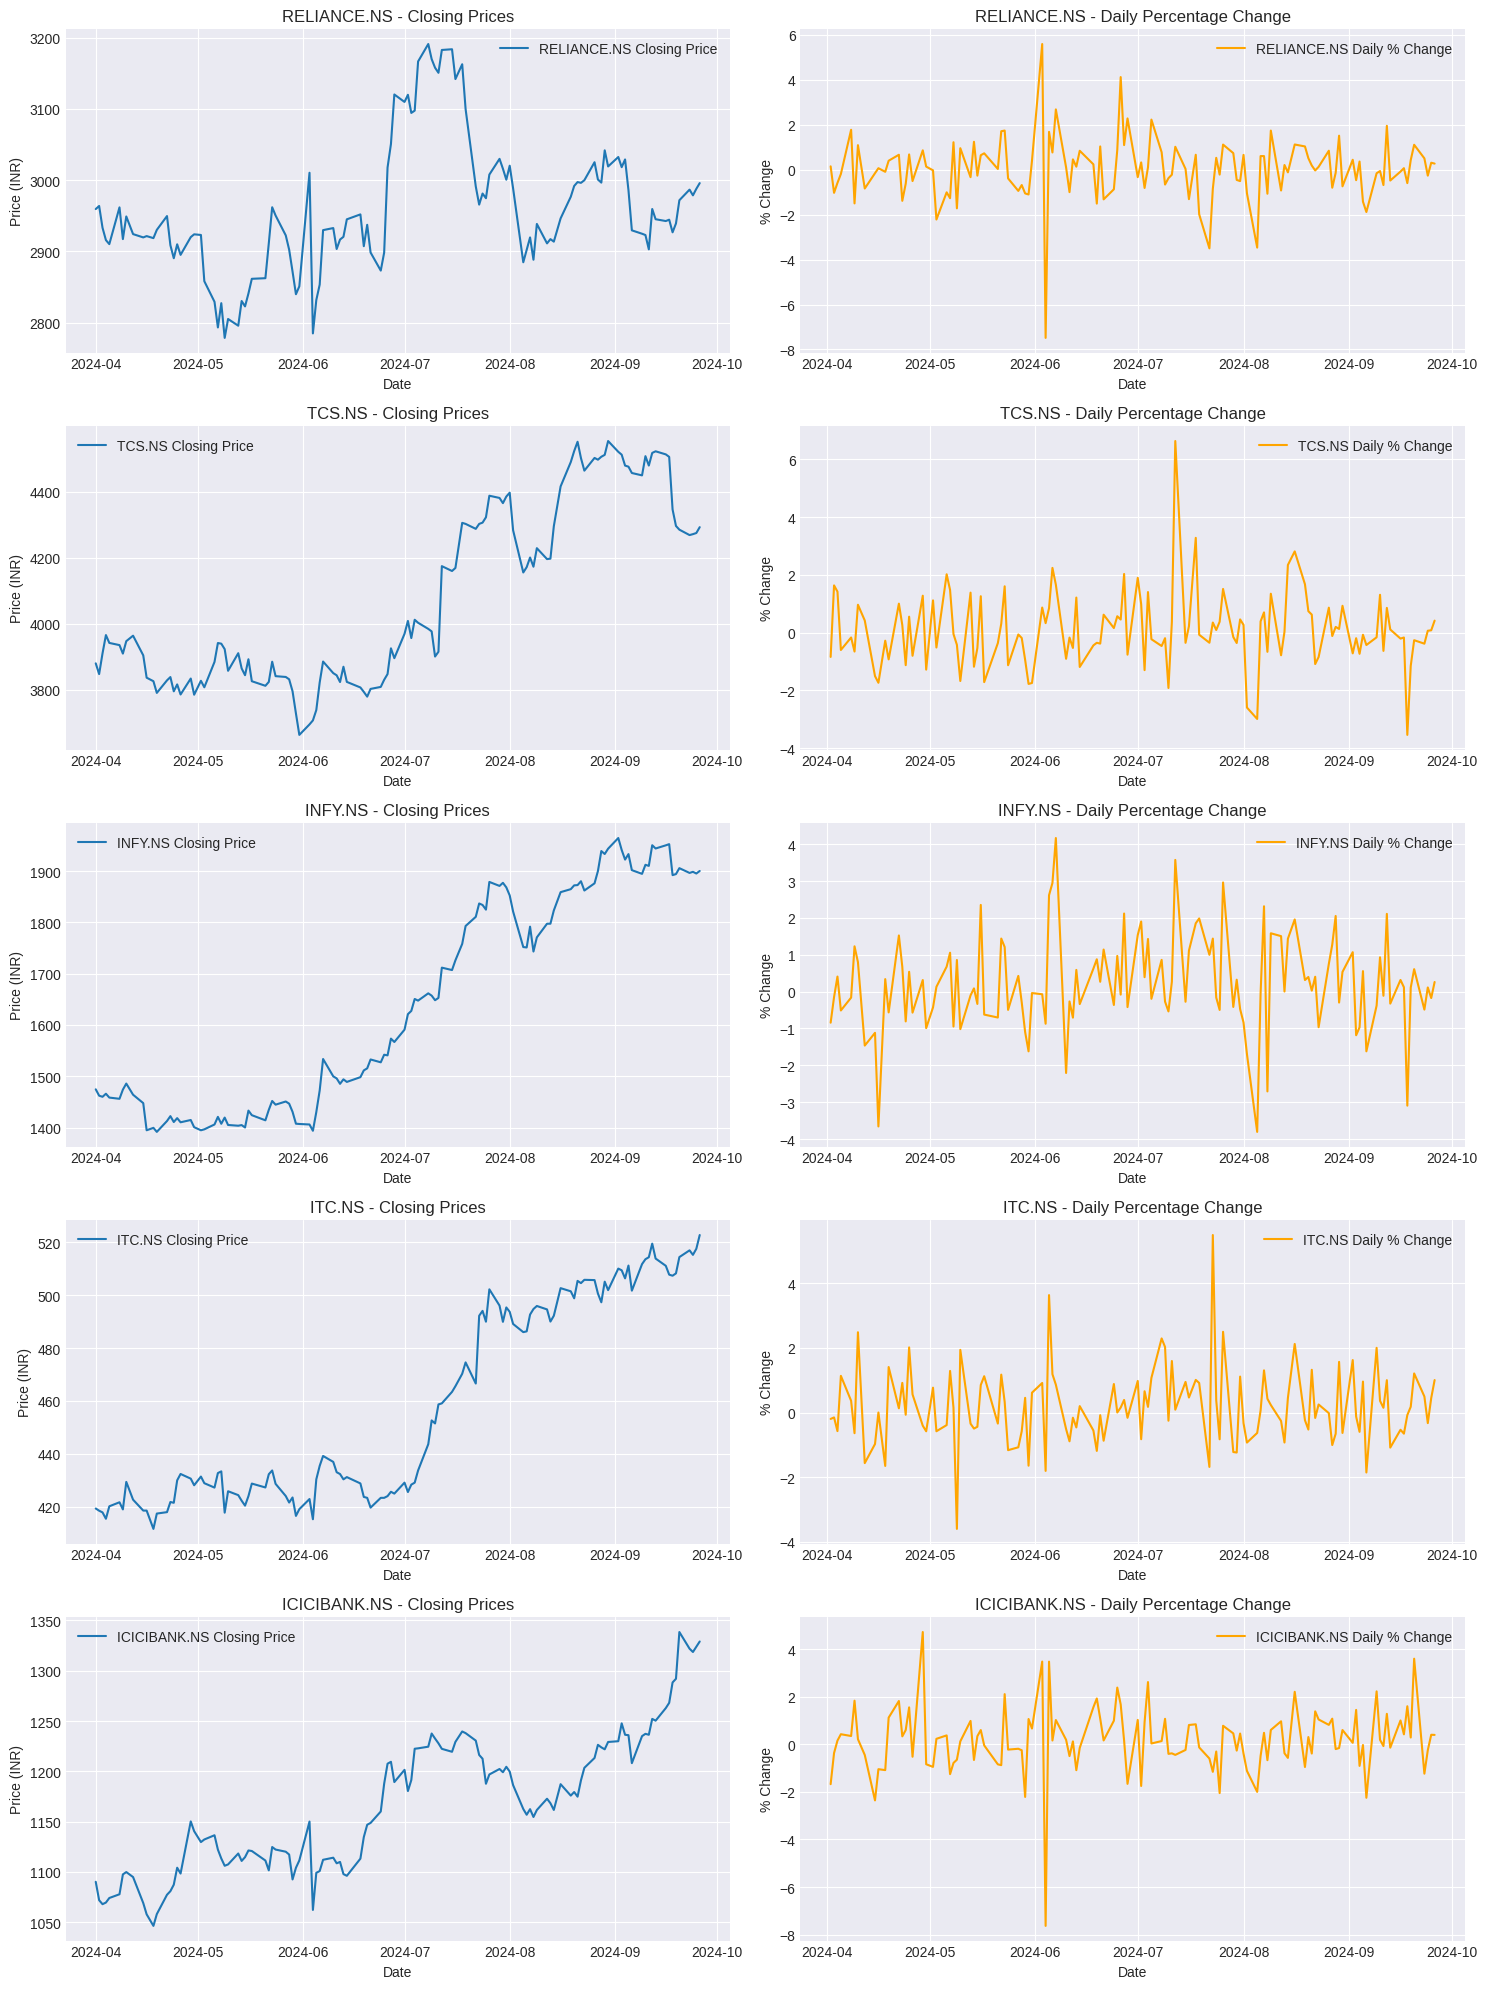

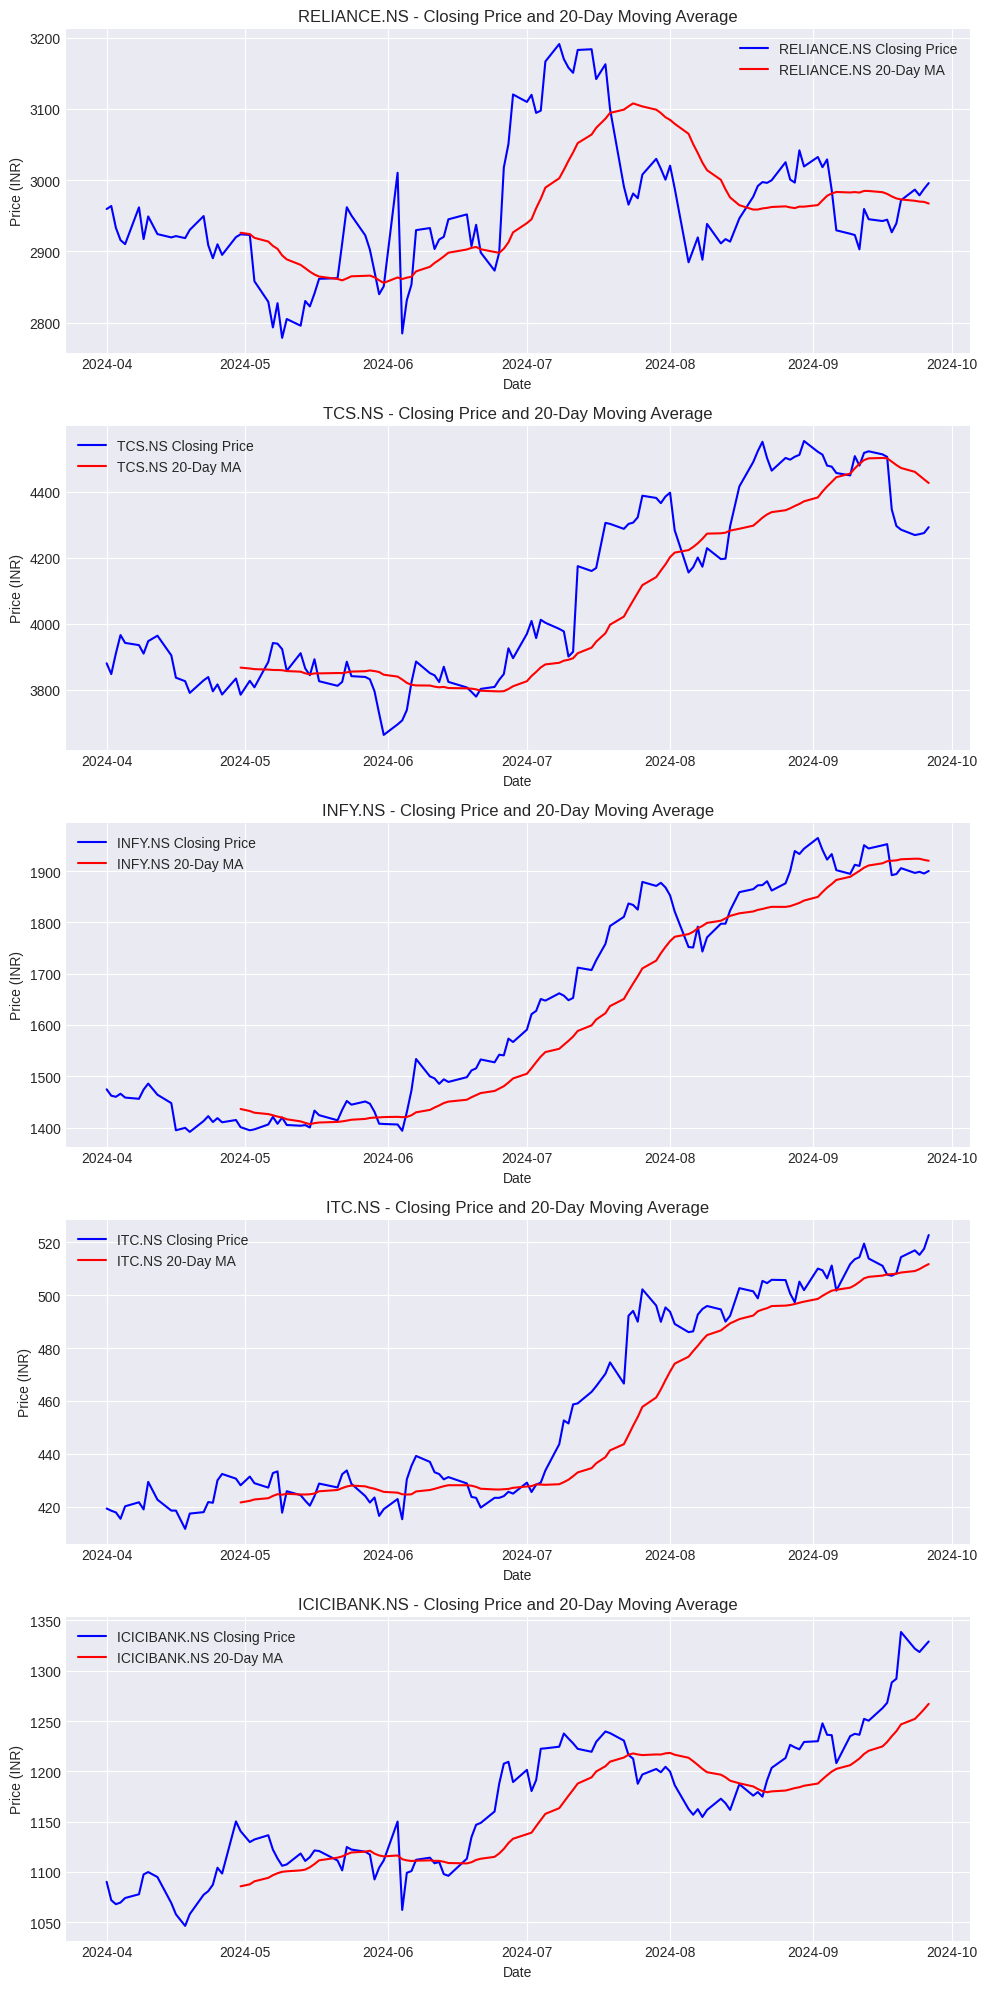

In [4]:
import matplotlib.pyplot as plt


all_data['Daily_Pct_Change'] = all_data.groupby('Stock')['Adj Close'].pct_change() * 100

# Plotting setup
plt.style.use('seaborn-darkgrid')

# b. Plot the closing prices and daily percentage changes for the 5 stocks
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

for i, stock in enumerate(nifty50_stocks):
    stock_data = all_data[all_data['Stock'] == stock]

    # Closing prices plot
    axes[i, 0].plot(stock_data['Date'], stock_data['Adj Close'], label=f'{stock} Closing Price')
    axes[i, 0].set_title(f'{stock} - Closing Prices')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Price (INR)')
    axes[i, 0].legend()

    # Daily percentage change plot
    axes[i, 1].plot(stock_data['Date'], stock_data['Daily_Pct_Change'], label=f'{stock} Daily % Change', color='orange')
    axes[i, 1].set_title(f'{stock} - Daily Percentage Change')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('% Change')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

# c. Calculate the moving average (20 days) for each stock and plot it against the stock's closing price
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

for i, stock in enumerate(nifty50_stocks):
    stock_data = all_data.loc[all_data['Stock'] == stock].copy()  # Explicitly create a copy to avoid the warning

    # Calculate 20-day moving average
    stock_data['20_Day_MA'] = stock_data['Adj Close'].rolling(window=20).mean()

    # Plot closing price and moving average
    ax[i].plot(stock_data['Date'], stock_data['Adj Close'], label=f'{stock} Closing Price', color='blue')
    ax[i].plot(stock_data['Date'], stock_data['20_Day_MA'], label=f'{stock} 20-Day MA', color='red')
    ax[i].set_title(f'{stock} - Closing Price and 20-Day Moving Average')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price (INR)')
    ax[i].legend()

plt.tight_layout()
plt.show()

#### Task 2



[*********************100%***********************]  1 of 1 completed
<ipython-input-20-c01522bcf22e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal'][50:] = [1 if stock_data['50_Day_MA'].iloc[i] > stock_data['200_Day_MA'].iloc[i] else -1


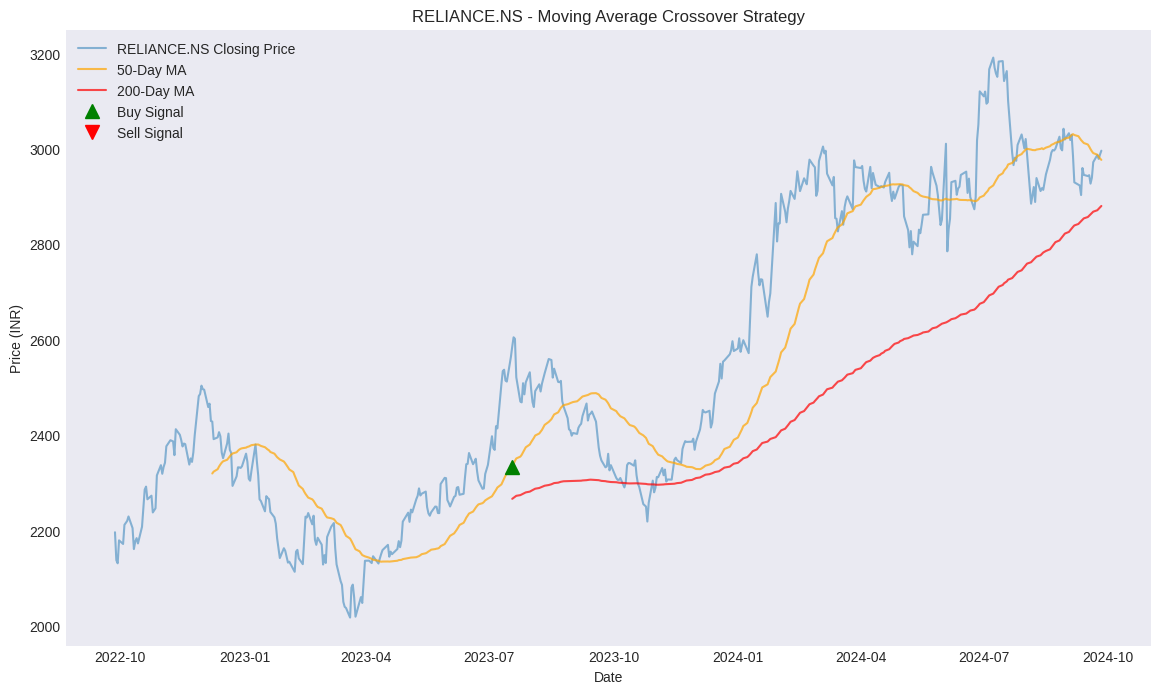

,Adj Close,50_Day_MA,200_Day_MA,Buy_Signal,Sell_Signal
Date,,,,,
2024-09-13,2945.250000,3012.001558,2854.076118,False,False
2024-09-16,2942.699951,3008.904814,2856.935352,False,False
2024-09-17,2944.600098,3004.466758,2859.757743,False,False
2024-09-18,2926.899902,2999.185356,2862.455256,False,False
2024-09-19,2939.350098,2994.576523,2865.222994,False,False
2024-09-20,2971.850098,2990.858872,2868.150741,False,False
2024-09-23,2986.750000,2987.581733,2871.121593,False,False
2024-09-24,2978.750000,2983.503770,2874.168302,False,False
2024-09-25,2987.899902,2979.588872,2877.176794,False,False


In [20]:

# from datetime import datetime, timedelta

# # Select one stock for the strategy (RELIANCE.NS)
# stock_symbol = 'RELIANCE.NS'

# # Set the time range: last 1 year for better analysis (more data for long-term MA)
# end_date = datetime.today()
start_date = end_date - timedelta(days=365*2)  # Approximate 2 years to calculate 200-day MA

# Fetch historical data for the stock
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 50-day (short-term) and 200-day (long-term) moving averages
stock_data['50_Day_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['200_Day_MA'] = stock_data['Adj Close'].rolling(window=200).mean()

# Create buy/sell signals based on the crossover strategy
stock_data['Signal'] = 0  # Default to no signal
stock_data['Signal'][50:] = [1 if stock_data['50_Day_MA'].iloc[i] > stock_data['200_Day_MA'].iloc[i] else -1
                             for i in range(50, len(stock_data))]  # 1 for Buy, -1 for Sell

# Identify buy and sell points
stock_data['Buy_Signal'] = (stock_data['Signal'] == 1) & (stock_data['Signal'].shift(1) == -1)
stock_data['Sell_Signal'] = (stock_data['Signal'] == -1) & (stock_data['Signal'].shift(1) == 1)

# Plot the stock's closing price along with the moving averages and buy/sell signals
plt.figure(figsize=(14, 8))

# Plot closing price
plt.plot(stock_data['Adj Close'], label=f'{stock_symbol} Closing Price', alpha=0.5)

# Plot moving averages
plt.plot(stock_data['50_Day_MA'], label='50-Day MA', color='orange', alpha=0.7)
plt.plot(stock_data['200_Day_MA'], label='200-Day MA', color='red', alpha=0.7)

# Plot Buy signals
plt.plot(stock_data[stock_data['Buy_Signal']].index,
         stock_data['50_Day_MA'][stock_data['Buy_Signal']],
         '^', markersize=10, color='green', label='Buy Signal', lw=0)

# Plot Sell signals
plt.plot(stock_data[stock_data['Sell_Signal']].index,
         stock_data['50_Day_MA'][stock_data['Sell_Signal']],
         'v', markersize=10, color='red', label='Sell Signal', lw=0)

plt.title(f'{stock_symbol} - Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Display the stock_data with signals
stock_data[['Adj Close', '50_Day_MA', '200_Day_MA', 'Buy_Signal', 'Sell_Signal']].tail(10)


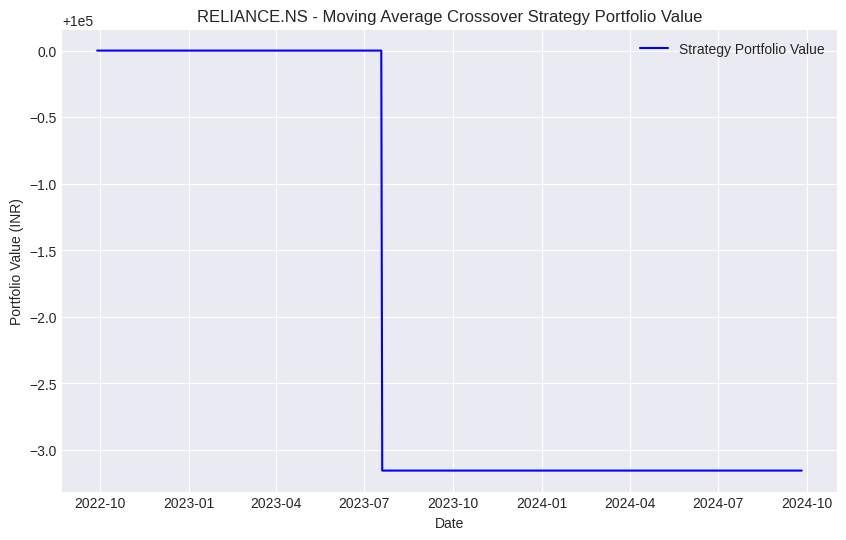

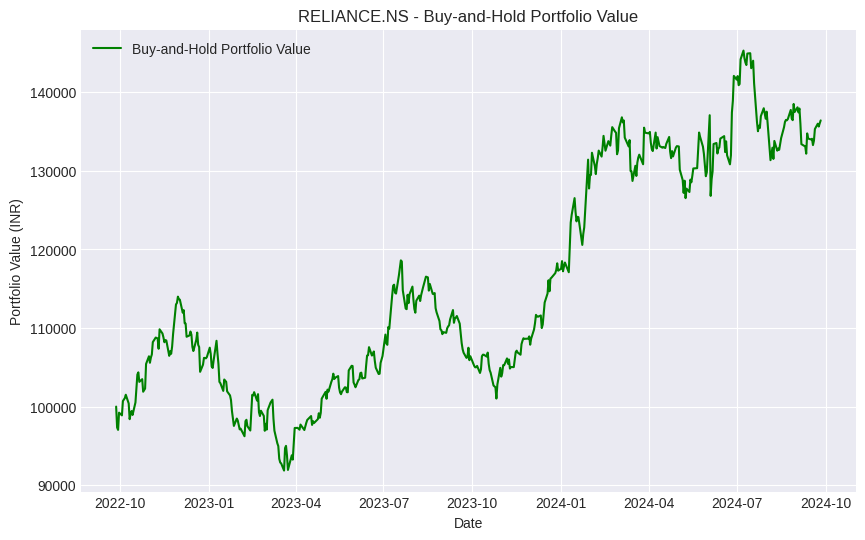

Final Portfolio Value using Moving Average Crossover Strategy: 99996.85 INR
Final Portfolio Value using Buy-and-Hold Strategy: 136394.40 INR
Total Returns from Moving Average Crossover Strategy: -0.00%
Total Returns from Buy-and-Hold Strategy: 36.39%


In [28]:
# Backtest the strategy
initial_capital = 100000  # Assume we start with 100,000 INR
positions = pd.DataFrame(index=stock_data.index).fillna(0.0)

# Buy and sell positions based on signals
positions['Stock'] = np.where(stock_data['Buy_Signal'], 1, 0)  # 1 for buy, 0 for no action
positions['Stock'] = np.where(stock_data['Sell_Signal'], 0, positions['Stock'])  # 0 for sell

# Shift positions to align with next day's closing price
positions['Stock'] = positions['Stock'].shift(1).fillna(0)

# Calculate portfolio value
portfolio = positions.multiply(stock_data['Adj Close'], axis=0)
portfolio['Holdings'] = positions['Stock'].multiply(stock_data['Adj Close'], axis=0)
portfolio['Cash'] = initial_capital - (positions.diff().multiply(stock_data['Adj Close'], axis=0)).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

# Calculate the returns from the strategy
portfolio['Returns'] = portfolio['Total'].pct_change()

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio['Total'], label='Strategy Portfolio Value', color='blue')
plt.title(f'{stock_symbol} - Moving Average Crossover Strategy Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Buy-and-hold strategy comparison
buy_and_hold = initial_capital * (stock_data['Adj Close'] / stock_data['Adj Close'].iloc[0])

# Plot buy-and-hold strategy portfolio value
plt.figure(figsize=(10, 6))
plt.plot(buy_and_hold, label='Buy-and-Hold Portfolio Value', color='green')
plt.title(f'{stock_symbol} - Buy-and-Hold Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Compare returns of the two strategies
final_strategy_value = portfolio['Total'].iloc[-1]
final_buy_and_hold_value = buy_and_hold.iloc[-1]

print(f"Final Portfolio Value using Moving Average Crossover Strategy: {final_strategy_value:.2f} INR")
print(f"Final Portfolio Value using Buy-and-Hold Strategy: {final_buy_and_hold_value:.2f} INR")

# Calculate cumulative returns for both strategies
strategy_cumulative_return = (final_strategy_value - initial_capital) / initial_capital * 100
buy_and_hold_cumulative_return = (final_buy_and_hold_value - initial_capital) / initial_capital * 100

print(f"Total Returns from Moving Average Crossover Strategy: {strategy_cumulative_return:.2f}%")
print(f"Total Returns from Buy-and-Hold Strategy: {buy_and_hold_cumulative_return:.2f}%")


### Task 3

Maximum Drawdown for RELIANCE.NS: -9.59%
Maximum Drawdown for TCS.NS: -7.64%
Maximum Drawdown for INFY.NS: -7.22%
Maximum Drawdown for ITC.NS: -4.45%
Maximum Drawdown for ICICIBANK.NS: -7.65%


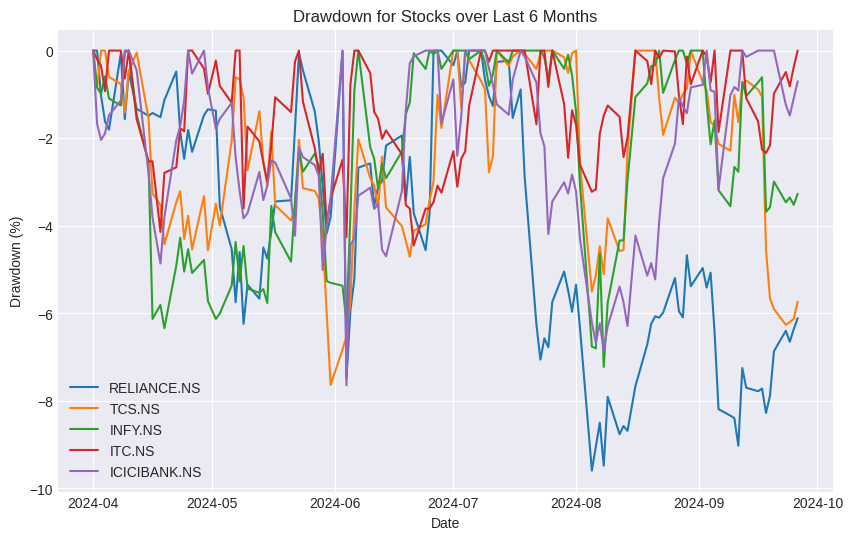

In [24]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta

# # List of 5 Nifty 50 stocks
# stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'ITC.NS', 'ICICIBANK.NS']

# # Time range for the last 6 months
# end_date = datetime.today()
# start_date = end_date - timedelta(days=180)

# # Fetch stock data
# data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate maximum drawdown for each stock
def calculate_max_drawdown(stock_prices):
    """
    Calculate the maximum drawdown for a stock.
    stock_prices: Series of adjusted closing prices for a stock
    """
    rolling_max = stock_prices.cummax()  # Calculate cumulative max
    daily_drawdown = stock_prices / rolling_max - 1  # Calculate daily drawdown
    max_drawdown = daily_drawdown.min()  # The largest drawdown (most negative)
    return max_drawdown

# Dictionary to store the maximum drawdown for each stock
max_drawdowns = {}

# Iterate over each stock and calculate its maximum drawdown
for stock in stocks:
    max_drawdown = calculate_max_drawdown(data[stock])
    max_drawdowns[stock] = max_drawdown

# Print the results
for stock, drawdown in max_drawdowns.items():
    print(f"Maximum Drawdown for {stock}: {drawdown * 100:.2f}%")

# Plotting the drawdowns
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot((data[stock] / data[stock].cummax() - 1) * 100, label=stock)

plt.title('Drawdown for Stocks over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


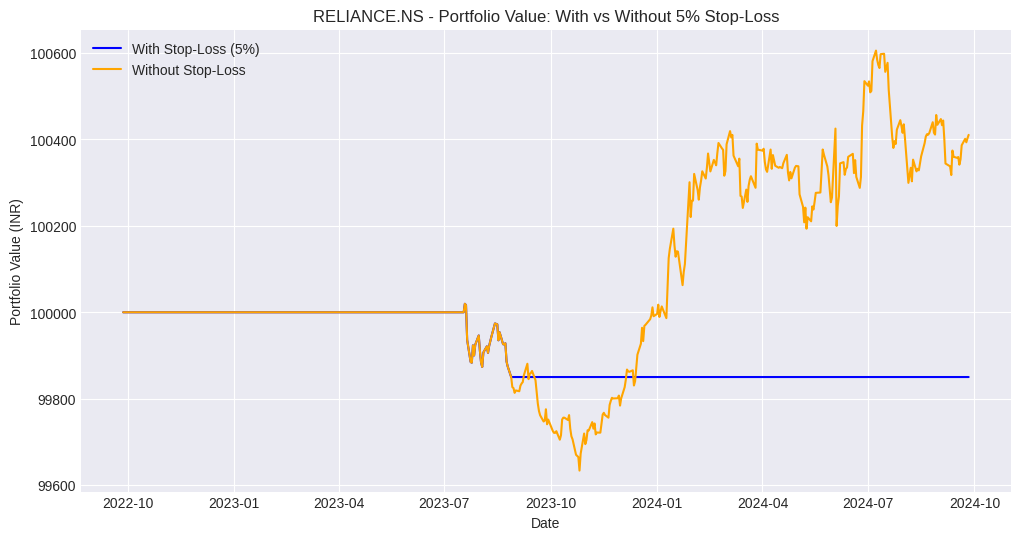

Final Portfolio Value with 5% Stop-Loss: 99850.15 INR
Final Portfolio Value without Stop-Loss: 100410.56 INR
Total Returns with 5% Stop-Loss: -0.15%
Total Returns without Stop-Loss: 0.41%


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Select the stock (RELIANCE.NS)
stock_symbol = 'RELIANCE.NS'

# Set the time range: last 2 years for long-term moving average
end_date = datetime.today()
start_date = end_date - timedelta(days=365*2)  # Approximate 2 years to calculate 200-day MA

# Fetch historical data for the stock
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 50-day (short-term) and 200-day (long-term) moving averages
stock_data['50_Day_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['200_Day_MA'] = stock_data['Adj Close'].rolling(window=200).mean()

# Create buy/sell signals based on the crossover strategy
stock_data['Signal'] = 0  # Default to no signal
stock_data.loc[stock_data.index[50:], 'Signal'] = [1 if stock_data['50_Day_MA'].iloc[i] > stock_data['200_Day_MA'].iloc[i] else -1
                                                   for i in range(50, len(stock_data))]  # 1 for Buy, -1 for Sell

# Identify buy and sell points
stock_data['Buy_Signal'] = (stock_data['Signal'] == 1) & (stock_data['Signal'].shift(1) == -1)
stock_data['Sell_Signal'] = (stock_data['Signal'] == -1) & (stock_data['Signal'].shift(1) == 1)

# Initial capital and stop-loss parameters
initial_capital = 100000  # Assume we start with 100,000 INR
stop_loss_pct = 0.05  # 5% stop-loss

# Initialize positions DataFrame and create a 'Stock' column
positions_with_stop_loss = pd.DataFrame(index=stock_data.index)
positions_without_stop_loss = pd.DataFrame(index=stock_data.index)
positions_with_stop_loss['Stock'] = 0  # Initialize with no position
positions_without_stop_loss['Stock'] = 0

# Stop-loss strategy variables
last_buy_price = 0
in_position = False  # To check if currently holding the stock

# Loop through the data to apply both strategies
for i in range(len(stock_data)):
    # Without Stop-Loss Strategy
    if stock_data['Buy_Signal'].iloc[i] and positions_without_stop_loss['Stock'].iloc[i-1] == 0:
        positions_without_stop_loss.loc[stock_data.index[i], 'Stock'] = 1  # Buy stock
    elif stock_data['Sell_Signal'].iloc[i] and positions_without_stop_loss['Stock'].iloc[i-1] == 1:
        positions_without_stop_loss.loc[stock_data.index[i], 'Stock'] = 0  # Sell stock
    else:
        positions_without_stop_loss.loc[stock_data.index[i], 'Stock'] = positions_without_stop_loss['Stock'].iloc[i-1]

    # With Stop-Loss Strategy
    if stock_data['Buy_Signal'].iloc[i] and not in_position:
        positions_with_stop_loss.loc[stock_data.index[i], 'Stock'] = 1  # Buy stock
        last_buy_price = stock_data['Adj Close'].iloc[i]
        in_position = True
    elif stock_data['Sell_Signal'].iloc[i] and in_position:
        positions_with_stop_loss.loc[stock_data.index[i], 'Stock'] = 0  # Sell stock
        in_position = False
    elif in_position and stock_data['Adj Close'].iloc[i] <= last_buy_price * (1 - stop_loss_pct):
        positions_with_stop_loss.loc[stock_data.index[i], 'Stock'] = 0  # Trigger sell on stop-loss
        in_position = False
    else:
        positions_with_stop_loss.loc[stock_data.index[i], 'Stock'] = positions_with_stop_loss['Stock'].iloc[i-1]

# Calculate portfolio values for both strategies
portfolio_with_stop_loss = pd.DataFrame(index=stock_data.index)
portfolio_without_stop_loss = pd.DataFrame(index=stock_data.index)

# Holdings for with and without stop-loss
portfolio_with_stop_loss['Holdings'] = positions_with_stop_loss['Stock'].multiply(stock_data['Adj Close'], axis=0)
portfolio_without_stop_loss['Holdings'] = positions_without_stop_loss['Stock'].multiply(stock_data['Adj Close'], axis=0)

# Cash calculation
portfolio_with_stop_loss['Cash'] = initial_capital - (positions_with_stop_loss.diff().multiply(stock_data['Adj Close'], axis=0)).cumsum().fillna(0)
portfolio_without_stop_loss['Cash'] = initial_capital - (positions_without_stop_loss.diff().multiply(stock_data['Adj Close'], axis=0)).cumsum().fillna(0)

# Total portfolio value
portfolio_with_stop_loss['Total'] = portfolio_with_stop_loss['Holdings'] + portfolio_with_stop_loss['Cash']
portfolio_without_stop_loss['Total'] = portfolio_without_stop_loss['Holdings'] + portfolio_without_stop_loss['Cash']

# Plot portfolio values for both strategies
plt.figure(figsize=(12, 6))
plt.plot(portfolio_with_stop_loss['Total'], label='With Stop-Loss (5%)', color='blue')
plt.plot(portfolio_without_stop_loss['Total'], label='Without Stop-Loss', color='orange')
plt.title(f'{stock_symbol} - Portfolio Value: With vs Without 5% Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate final returns for both strategies
final_value_with_stop_loss = portfolio_with_stop_loss['Total'].iloc[-1]
final_value_without_stop_loss = portfolio_without_stop_loss['Total'].iloc[-1]

# Calculate cumulative returns for both strategies
returns_with_stop_loss = (final_value_with_stop_loss - initial_capital) / initial_capital * 100
returns_without_stop_loss = (final_value_without_stop_loss - initial_capital) / initial_capital * 100

# Print results
print(f"Final Portfolio Value with 5% Stop-Loss: {final_value_with_stop_loss:.2f} INR")
print(f"Final Portfolio Value without Stop-Loss: {final_value_without_stop_loss:.2f} INR")
print(f"Total Returns with 5% Stop-Loss: {returns_with_stop_loss:.2f}%")
print(f"Total Returns without Stop-Loss: {returns_without_stop_loss:.2f}%")
